# **Trocr_Normal**

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

# بارگذاری مدل و پردازشگر TrOCR
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

# تابع برای استخراج متن از عکس
def extract_text(image_path):
    # باز کردن عکس و تبدیل به فرمت RGB
    image = Image.open(image_path).convert("RGB")

    # پردازش عکس و استخراج متن
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return text

# استفاده از کد
if __name__ == "__main__":
    image_path = input("لطفاً مسیر عکس رو وارد کنید (مثلاً C:/path/to/image.jpg): ")
    try:
        extracted_text = extract_text(image_path)
        print("متن استخراج‌شده:", extracted_text)
    except Exception as e:
        print("خطا رخ داد:", str(e))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

لطفاً مسیر عکس رو وارد کنید (مثلاً C:/path/to/image.jpg): /content/instruction_001.png
متن استخراج‌شده: 2 2 2


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


لطفاً مسیر عکس رو وارد کنید (مثلاً C:/path/to/image.jpg): /content/instruction_000.png
متن استخراج‌شده: 0 issues .


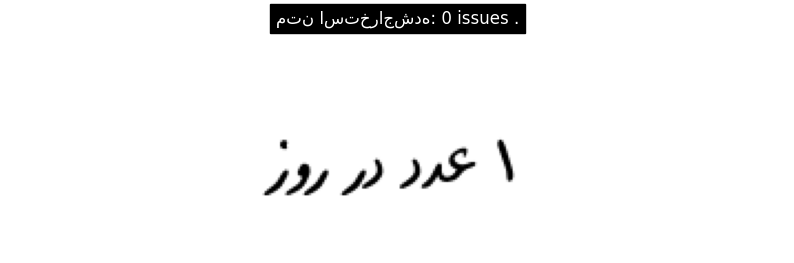

In [ ]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
import matplotlib.pyplot as plt

# بارگذاری مدل و پردازشگر TrOCR
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

# تابع برای استخراج متن از عکس
def extract_text(image_path):
    # باز کردن عکس و تبدیل به فرمت RGB
    image = Image.open(image_path).convert("RGB")

    # پردازش عکس و استخراج متن
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return text, image

# استفاده از کد
if __name__ == "__main__":
    image_path = input("لطفاً مسیر عکس رو وارد کنید (مثلاً C:/path/to/image.jpg): ")
    try:
        extracted_text, original_image = extract_text(image_path)
        print("متن استخراج‌شده:", extracted_text)

        # نمایش متن استخراج‌شده روی تصویر
        plt.figure(figsize=(10, 5))
        plt.imshow(original_image)
        plt.title("متن استخراج‌شده: " + extracted_text, fontsize=12, color='white', backgroundcolor='black')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("خطا رخ داد:", str(e))

In [ ]:
!pip install transformers datasets torch pillow
!apt-get install unrar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!unrar x /content/farsi_dataset.rar /content/images/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/farsi_dataset.rar

Creating    /content/images                                           OK
Creating    /content/images/farsi_dataset                             OK
Extracting  /content/images/farsi_dataset/instruction_000.png              0%  OK 
Extracting  /content/images/farsi_dataset/instruction_001.png              1%  OK 
Extracting  /content/images/farsi_dataset/instruction_002.png              1%  OK 
Extracting  /content/images/farsi_dataset/instruction_003.png              2%  OK 
Extracting  /content/images/farsi_dataset/instruction_004.png              3%  OK 
Extracting  /content/images/farsi_dataset/instruction_005.png              3%  OK 
Extracting  /content/images/farsi_dataset/instruction_006.png              4%  OK 
Extracting  /content/images/farsi_dataset/instruction_007.png              5%  OK

# **Trocr_Finetune**

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset, Image
from PIL import Image
import torch
import os

# بارگذاری مدل و پردازشگر اولیه
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

# تنظیم decoder_start_token_id و pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id  # توکن شروع (<s>)
model.config.pad_token_id = processor.tokenizer.pad_token_id  # توکن پرکننده

# آماده‌سازی دیتاست با داده‌های ارائه‌شده
def load_custom_dataset():
    image_dir = "/content/images/farsi_dataset"  # دایرکتوری استخراج‌شده در Colab
    image_paths = [os.path.join(image_dir, f"instruction_{i:03d}.png") for i in range(143)]  # از 000 تا 142
    text_labels = [
        "۱ عدد در روز", "۱ عدد در شب", "۱ عدد قبل از خواب", "۱ عدد بعد از غذا", "۱ عدد قبل از غذا",
        "۱ قرص در روز", "۱ قرص در شب", "۱ قرص قبل از خواب", "۱ قرص بعد از غذا", "۱ قرص قبل از غذا",
        "۱ نوبت در روز", "۱ نوبت در شب", "۱ نوبت قبل از خواب", "۱ نوبت بعد از غذا", "۱ نوبت قبل از غذا",
        "۲ عدد در روز", "۲ عدد در شب", "۲ عدد قبل از خواب", "۲ عدد بعد از غذا", "۲ عدد قبل از غذا",
        "۲ قرص در روز", "۲ قرص در شب", "۲ قرص قبل از خواب", "۲ قرص بعد از غذا", "۲ قرص قبل از غذا",
        "۲ نوبت در روز", "۲ نوبت در شب", "۲ نوبت قبل از خواب", "۲ نوبت بعد از غذا", "۲ نوبت قبل از غذا",
        "۳ عدد در روز", "۳ عدد در شب", "۳ عدد قبل از خواب", "۳ عدد بعد از غذا", "۳ عدد قبل از غذا",
        "۳ قرص در روز", "۳ قرص در شب", "۳ قرص قبل از خواب", "۳ قرص بعد از غذا", "۳ قرص قبل از غذا",
        "۳ نوبت در روز", "۳ نوبت در شب", "۳ نوبت قبل از خواب", "۳ نوبت بعد از غذا", "۳ نوبت قبل از غذا",
        "۴ عدد در روز", "۴ عدد در شب", "۴ عدد قبل از خواب", "۴ عدد بعد از غذا", "۴ عدد قبل از غذا",
        "۴ قرص در روز", "۴ قرص در شب", "۴ قرص قبل از خواب", "۴ قرص بعد از غذا", "۴ قرص قبل از غذا",
        "۴ نوبت در روز", "۴ نوبت در شب", "۴ نوبت قبل از خواب", "۴ نوبت بعد از غذا", "۴ نوبت قبل از غذا",
        "۵ عدد در روز", "۵ عدد در شب", "۵ عدد قبل از خواب", "۵ عدد بعد از غذا", "۵ عدد قبل از غذا",
        "۵ قرص در روز", "۵ قرص در شب", "۵ قرص قبل از خواب", "۵ قرص بعد از غذا", "۵ قرص قبل از غذا",
        "۵ نوبت در روز", "۵ نوبت در شب", "۵ نوبت قبل از خواب", "۵ نوبت بعد از غذا", "۵ نوبت قبل از غذا",
        "۶ عدد در روز", "۶ عدد در شب", "۶ عدد قبل از خواب", "۶ عدد بعد از غذا", "۶ عدد قبل از غذا",
        "۶ قرص در روز", "۶ قرص در شب", "۶ قرص قبل از خواب", "۶ قرص بعد از غذا", "۶ قرص قبل از غذا",
        "۶ نوبت در روز", "۶ نوبت در شب", "۶ نوبت قبل از خواب", "۶ نوبت بعد از غذا", "۶ نوبت قبل از غذا",
        "۷ عدد در روز", "۷ عدد در شب", "۷ عدد قبل از خواب", "۷ عدد بعد از غذا", "۷ عدد قبل از غذا",
        "۷ قرص در روز", "۷ قرص در شب", "۷ قرص قبل از خواب", "۷ قرص بعد از غذا", "۷ قرص قبل از غذا",
        "۷ نوبت در روز", "۷ نوبت در شب", "۷ نوبت قبل از خواب", "۷ نوبت بعد از غذا", "۷ نوبت قبل از غذا",
        "۸ عدد در روز", "۸ عدد در شب", "۸ عدد قبل از خواب", "۸ عدد بعد از غذا", "۸ عدد قبل از غذا",
        "۸ قرص در روز", "۸ قرص در شب", "۸ قرص قبل از خواب", "۸ قرص بعد از غذا", "۸ قرص قبل از غذا",
        "۸ نوبت در روز", "۸ نوبت در شب", "۸ نوبت قبل از خواب", "۸ نوبت بعد از غذا", "۸ نوبت قبل از غذا",
        "۹ عدد در روز", "۹ عدد در شب", "۹ عدد قبل از خواب", "۹ عدد بعد از غذا", "۹ عدد قبل از غذا",
        "۹ قرص در روز", "۹ قرص در شب", "۹ قرص قبل از خواب", "۹ قرص بعد از غذا", "۹ قرص قبل از غذا",
        "۹ نوبت در روز", "۹ نوبت در شب", "۹ نوبت قبل از خواب", "۹ نوبت بعد از غذا", "۹ نوبت قبل از غذا",
        "هر ۴ ساعت", "هر ۶ ساعت", "هر ۸ ساعت", "هر ۱۲ ساعت", "هر ۲۴ ساعت",
        "صبح و شب", "شب‌ها", "صبح‌ها"
    ]
    # فقط فایل‌های موجود رو بارگذاری کن
    valid_image_paths = [path for path in image_paths if os.path.exists(path)]
    if not valid_image_paths:
        raise ValueError("هیچ تصویری پیدا نشد! مسیر دایرکتوری رو چک کن.")
    images = [Image.open(path).convert("RGB") for path in valid_image_paths]
    encodings = processor(images=images, padding=True, truncation=True, return_tensors="pt")
    encodings["labels"] = processor.tokenizer(text_labels[:len(images)], padding=True, truncation=True, return_tensors="pt").input_ids
    return Dataset.from_dict(encodings)

# تابع برای آماده‌سازی داده‌ها
def prepare_dataset(image_paths, text_labels):
    images = [Image.open(path).convert("RGB") for path in image_paths if os.path.exists(path)]
    encodings = processor(images=images, padding=True, truncation=True, return_tensors="pt")
    encodings["labels"] = processor.tokenizer(text_labels[:len(images)], padding=True, truncation=True, return_tensors="pt").input_ids
    return Dataset.from_dict(encodings)

# آماده‌سازی دیتاست
dataset = load_custom_dataset()

# تنظیمات آموزش
training_args = Seq2SeqTrainingArguments(
    output_dir="./trocr_finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    save_steps=500,
    save_total_limit=2,
    logging_dir='./logs',
    logging_steps=10,
    run_name="trocr_finetuned_run",  # برای رفع هشدار wandb
)

# تعریف تابع محاسبه متریک (اختیاری)
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {"accuracy": (labels == preds).mean()}

# تنظیمات ترنر
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    compute_metrics=compute_metrics,
)

# شروع فاین‌تuning
trainer.train()

# ذخیره مدل فاین‌تun شده
model.save_pretrained("./trocr_finetuned")
processor.save_pretrained("./trocr_finetuned")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
10,7.148300
20,3.526400
30,2.958000
40,2.547700
50,2.401800
60,2.150200
70,1.988400
80,1.954000
90,1.755600
100,1.688400


[]

لطفاً مسیر تصویر را وارد کنید (مثلاً /content/images/instruction_000.png): /content/instruction_000.png
متن تشخیص‌داده‌شده: ۵��� �ر �ر �ر��


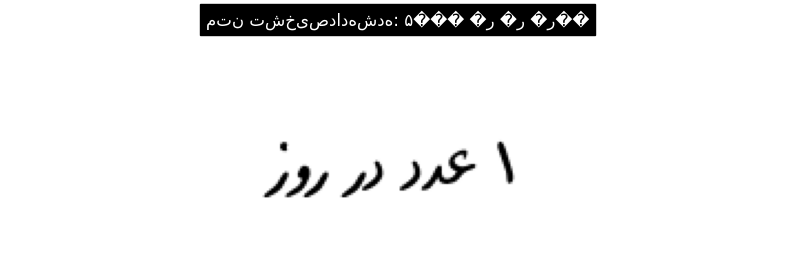

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import matplotlib.pyplot as plt
import torch

# بارگذاری مدل و پردازشگر فاین‌تون‌شده
processor = TrOCRProcessor.from_pretrained("./trocr_finetuned")
model = VisionEncoderDecoderModel.from_pretrained("./trocr_finetuned")

# تابع برای استخراج متن از تصویر
def extract_text(image_path):
    # باز کردن تصویر و تبدیل به فرمت RGB
    image = Image.open(image_path).convert("RGB")

    # پردازش تصویر و تولید متن
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return text, image

# استفاده از کد برای تست
if __name__ == "__main__":
    image_path = input("لطفاً مسیر تصویر را وارد کنید (مثلاً /content/images/instruction_000.png): ")
    try:
        extracted_text, original_image = extract_text(image_path)
        print("متن تشخیص‌داده‌شده:", extracted_text)

        # نمایش تصویر و متن تشخیص‌داده‌شده
        plt.figure(figsize=(10, 5))
        plt.imshow(original_image)
        plt.title("متن تشخیص‌داده‌شده: " + extracted_text, fontsize=12, color='white', backgroundcolor='black')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("خطا رخ داد:", str(e))